In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

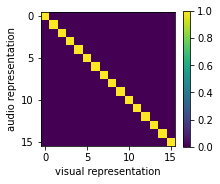

In [4]:

a = np.eye(16)
b = 1 - np.eye(16)

plt.figure(figsize=(3,2.5))
# plt.subplot(121)
plt.imshow(a)
plt.xlabel('visual representation')
plt.ylabel('audio representation')
# plt.title('(a) positive scores')
plt.colorbar()
# plt.subplot(122)
# plt.imshow(b)
# plt.title('(b) negative scores')
# plt.colorbar()
# plt.show()

plt.savefig('diag.pdf')


In [123]:
import csv

def csv_to_list(csv_path):
    as_list = None
    with open(csv_path, 'r') as f:
        reader = csv.reader(f)
        as_list = list(reader)
    return as_list

In [131]:
csv_original = csv_to_list(test_file)[1:]

csv_array = np.array(csv_original)

names = csv_array[:,0]

# let us first append the list with the two extra columns
sz = csv_array.shape[0]
empty_arr = np.empty((sz,4)) # male_x, male_y, female_x, female_y


csv_array = np.append(csv_array, empty_arr, axis=-1)
print(csv_array.shape)

csv_array


(78715, 9)


array([['conversation1_t3-cam01', '0', '1', ..., '0.0', '0.0', '0.0'],
       ['conversation1_t3-cam01', '0.03', '1', ..., '0.0', '0.0', '0.0'],
       ['conversation1_t3-cam01', '0.07', '1', ..., '0.0', '0.0', '0.0'],
       ...,
       ['malemonologue2_t3-cam22', '21.9', '1', ..., '0.0', '0.0', '0.0'],
       ['malemonologue2_t3-cam22', '21.93', '1', ..., '0.0', '0.0',
        '0.0'],
       ['malemonologue2_t3-cam22', '21.97', '1', ..., '0.0', '0.0',
        '0.0']], dtype='<U32')

In [139]:
test_seqs = ['conversation1_t3', 'femalemonologue2_t3', 'interactive1_t2', 'interactive4_t3', 'malemonologue2_t3']

# test_seqs = ['conversation1_t3']

male = [True, False, True, True, True]
female = [True, True, True, True, False]

cams = ['01', '02', '03', '04', '05', 
        '06', '07', '08', '09', '10',
        '11', '12', '13', '14', '15',
        '16', '17', '18', '19', '20',
        '21', '22']

# cams = ['01']

for seq_idx, seq in enumerate(test_seqs):
        for cam in cams:

                # cam_idx = 2
                # seq_idx = 0
                # cam = cams[cam_idx]
                # seq = test_seqs[seq_idx]

                seq_cam = seq+'-cam'+cam
                sub_file = os.path.join(sub_folder, seq, '2D_projections', seq_cam +'_GT.csv')
                csv_sub = csv_to_list(sub_file)
                sub_array = np.array(csv_sub)

                coord = sub_array[:, 1:3].astype('float')

                current_idxs = np.sort(np.where(names==seq_cam))
                
        
                if male[seq_idx] and female[seq_idx]:
                        m_idxs = np.sort(np.where(sub_array[:,-1]==str(1)))[0]
                        f_idxs = np.sort(np.where(sub_array[:,-1]==str(2)))[0]

                        csv_array[current_idxs, -4:-2] = coord[m_idxs]
                        csv_array[current_idxs, -2:] = coord[f_idxs]

                        print('both')

                elif male[seq_idx]:
                        print('male only')
                        csv_array[current_idxs, -4:-2] = coord

                else:
                        print('female only')
                        csv_array[current_idxs, -2:] = coord
                        # print(seq, len(current_idxs[0]), len(sub_array))


both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
female only
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both
both


ValueError: shape mismatch: value array of shape (815,2) could not be broadcast to indexing result of shape (1,0,2)

In [136]:
print(csv_array)

[['conversation1_t3-cam01' '0' '1' ... '476.0' '872.0' '565.0']
 ['conversation1_t3-cam01' '0.03' '1' ... '477.0' '872.0' '565.0']
 ['conversation1_t3-cam01' '0.07' '1' ... '478.0' '872.0' '565.0']
 ...
 ['malemonologue2_t3-cam22' '21.9' '1' ... '0.0' '0.0' '0.0']
 ['malemonologue2_t3-cam22' '21.93' '1' ... '0.0' '0.0' '0.0']
 ['malemonologue2_t3-cam22' '21.97' '1' ... '0.0' '0.0' '0.0']]


In [57]:
sub_array.shape

(2090, 4)

(array([2090, 2091, 2092, ..., 3132, 3133, 3134], dtype=int64),)